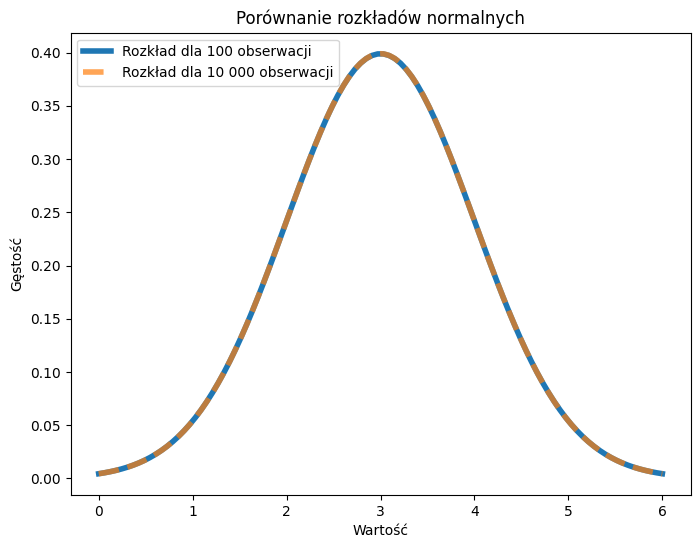

Statystyki opisowe dla 100 obserwacji:
   średnia  odchylenie standardowe   Q1  mediana   Q3  wariancja
0      3.0                1.758272  1.5      3.0  4.5   3.091521

Statystyki opisowe dla 10 000 obserwacji:
   średnia  odchylenie standardowe   Q1  mediana   Q3  wariancja
0      3.0                1.732311  1.5      3.0  4.5     3.0009


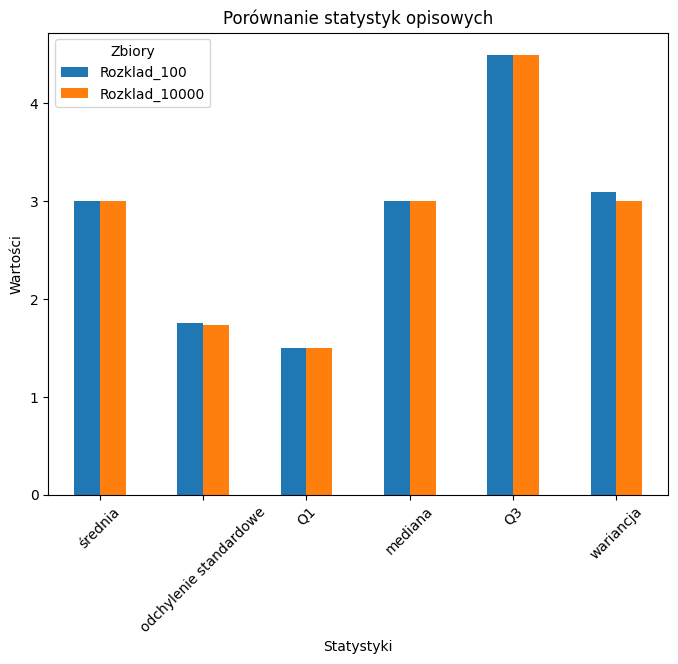

Połączone statystyki:


,średnia,odchylenie standardowe,Q1,mediana,Q3,wariancja
Rozklady,,,,,,
Rozklad_100,3.0,1.758272,1.5,3.0,4.5,3.091521
Rozklad_10000,3.0,1.732311,1.5,3.0,4.5,3.000900


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

srednia = 3
odchylenie = 1
zbior_100 = np.linspace(0, 6, 100)
zbior_10k = np.linspace(0, 6, 10000)


def gauss(dane, srednia=3, odchylenie=1):
    return stats.norm.pdf(dane, srednia, odchylenie)


def statystyki(data):
    wskazniki = {
        'średnia': np.mean(data),
        'odchylenie standardowe': np.std(data, ddof=1),
        'Q1': np.percentile(data, 25),
        'mediana': np.median(data),
        'Q3': np.percentile(data, 75),
        'wariancja': np.var(data, ddof=1),
    }
    return wskazniki


plt.figure(figsize=(8, 6))
plt.plot(zbior_100, gauss(zbior_100, srednia, odchylenie), color='#1f77b4', lw=4, label='Rozkład dla 100 obserwacji')
plt.plot(zbior_10k, gauss(zbior_10k, srednia, odchylenie), color='#ff7f0e', linestyle='--', lw=4, alpha=0.7, label='Rozkład dla 10 000 obserwacji')
plt.legend(loc='upper left')
plt.title('Porównanie rozkładów normalnych')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.show()


statystyki_100 = statystyki(zbior_100)
statystyki_df_100 = pd.DataFrame(statystyki_100, index=[0])
print("Statystyki opisowe dla 100 obserwacji:")
print(statystyki_df_100)

statystyki_10k = statystyki(zbior_10k)
statystyki_df_10k = pd.DataFrame(statystyki_10k, index=[0])
print("\nStatystyki opisowe dla 10 000 obserwacji:")
print(statystyki_df_10k)
\
total = pd.concat([statystyki_df_100, statystyki_df_10k], axis=0)
total['Rozklady'] = ['Rozklad_100', 'Rozklad_10000']
total.set_index('Rozklady', inplace=True)


total.T.plot(kind='bar', figsize=(8, 6), rot=45)
plt.title('Porównanie statystyk opisowych')
plt.xlabel('Statystyki')
plt.ylabel('Wartości')
plt.legend(title='Zbiory')
plt.show()
print("Połączone statystyki:")
total

Główne statystyki opisowe nie różnią się zbytnio między zbiorami stworzonymi metodą np.linspace() zawierającymi 100 i 10000 elementów. Podobnie sytuacja wygląda, gdy zbiory zostaną utworzone metodą np.random.normal()

In [ ]:
# srednia = 3
# odchylenie = 1

# np.random.seed(1)
# zbior_100 = np.random.normal(srednia, odchylenie, 100)
# zbior_10k = np.random.normal(srednia, odchylenie, 10000)


# def statystyki(data):
#     wskazniki = {
#         'średnia': np.mean(data),
#         'odchylenie standardowe': np.std(data, ddof=1),
#         'Q1': np.percentile(data, 25),
#         'mediana': np.median(data),
#         'Q3': np.percentile(data, 75),
#         'wariancja': np.var(data, ddof=1)
  
#     }
#     return wskazniki


# sorted_zbior_100 = np.sort(zbior_100)
# sorted_zbior_10k = np.sort(zbior_10k)


# plt.figure(figsize=(8, 6))
# plt.plot(sorted_zbior_100, stats.norm.pdf(sorted_zbior_100, srednia, odchylenie), color='#1f77b4', lw=4, label='Rozkład dla 100 obserwacji')
# plt.plot(sorted_zbior_10k, stats.norm.pdf(sorted_zbior_10k, srednia, odchylenie), color='#ff7f0e', linestyle='--', lw=4, alpha=0.7, label='Rozkład dla 10 000 obserwacji')
# plt.legend(loc='upper left')
# plt.title('Porównanie rozkładów normalnych')
# plt.xlabel('Wartość')
# plt.ylabel('Gęstość')
# plt.show()

# statystyki_100 = statystyki(zbior_100)
# statystyki_df_100 = pd.DataFrame(statystyki_100, index=[0])
# print("Statystyki opisowe dla 100 obserwacji:")
# print(statystyki_df_100)

# statystyki_10k = statystyki(zbior_10k)
# statystyki_df_10k = pd.DataFrame(statystyki_10k, index=[0])
# print("\nStatystyki opisowe dla 10 000 obserwacji:")
# print(statystyki_df_10k)


# total = pd.concat([statystyki_df_100, statystyki_df_10k], axis=0)
# total['Rozklady'] = ['Rozklad_100', 'Rozklad_10000']
# total.set_index('Rozklady', inplace=True)


# total.T.plot(kind='bar', figsize=(8,6), rot=45)
# plt.title('Porównanie statystyk opisowych')
# plt.xlabel('Statystyki')
# plt.ylabel('Wartości')
# plt.legend(title='Zbiory')
# plt.show()

# print("Połączone statystyki:")
# print(total)